In [ ]:
#爬取某个用户的所有回答的标题，链接，标签和赞同数
#画图表示用户的回答中的各标签对应的比例和用户获得赞中各标签对应的比例
#登录部分代码来自网络
from selenium import webdriver
import time
from bs4 import BeautifulSoup


driver=webdriver.Chrome() 
driver.get("http://www.zhihu.com")       #打开知乎我们要登录
time.sleep(2)                            #让操作稍微停一下
driver.find_element_by_link_text('登录').click() #找到‘登录’按钮并点击
time.sleep(5)
driver.find_element_by_class_name('signin-switch-password').click() #找到‘登录’按钮并点击
time.sleep(2)
#找到输入账号的框，并自动输入账号 这里要替换为你的登录账号
driver.find_element_by_name('account').send_keys('')
time.sleep(2)
#密码，这里要替换为你的密码
driver.find_element_by_name('password').send_keys('')
time.sleep(2)
#输入浏览器中显示的验证码，这里如果知乎让你找烦人的倒立汉字，手动登录一下，再停止程序，退出#浏览器，然后重新启动程序，直到让你输入验证码
yanzhengma=input('验证码:')
# driver.find_element_by_name('captcha').send_keys(yanzhengma)
#找到登录按钮，并点击
driver.find_element_by_css_selector('div.button-wrapper.command > button').click()
cookie=driver.get_cookies()
time.sleep(3)
base_url = 'https://www.zhihu.com/people/zhang-jia-wei/answers?page='
page = 0
tag_count = {}#包含该话题的文章数
tag_upvote_count = {}#包含该话题的文章或得的赞数
while(1):
    page = page + 1
    print('page:', page)
    url = base_url + str(page)
    driver.get(url)
    time.sleep(1)

    html=driver.page_source
    soup=BeautifulSoup(html,'lxml')
    is_empty = soup.select('div.EmptyState')
    if (len(is_empty) > 0):
        print('end')
        break
    answers = soup.select('.ContentItem-title > div > a')
    # print(answers)
    for answer in answers:
        title = answer.getText()
        answer_url = 'https://www.zhihu.com' + answer.get('href')
        driver.get(answer_url)
        time.sleep(1)
        html = driver.page_source
        soup1 = BeautifulSoup(html,'lxml')
        upvote = soup1.select('span.Voters > button')[0].get_text().split(' ')[0]
        tags = soup1.select('a.TopicLink > div.Popover > div')
        tags = [tag.get_text() for tag in tags]
        for tag in tags:
            if not tag in tag_count:
                tag_count[tag] = 0
            if not tag in tag_upvote_count:
                tag_upvote_count[tag] = 0
            tag_count[tag] = tag_count[tag] + 1
            tag_upvote_count[tag] = tag_upvote_count[tag] + int(upvote)
        data={'title':title,'url':answer_url,'upvote':upvote,'tags':tags}
        print(data)
print(tag_count)
print(tag_upvote_count)

4


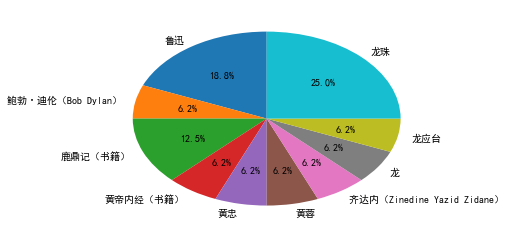

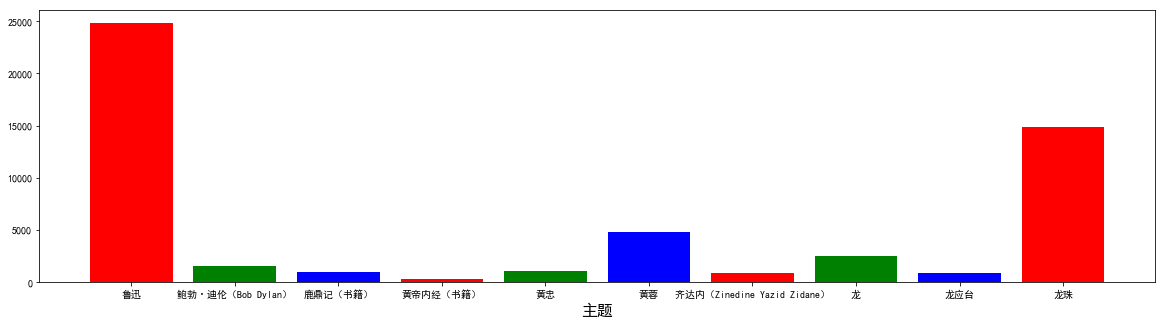

In [34]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline

labels = []
nums = []
list = [] 
for tag in tag_count:
    list.append((tag,tag_count[tag]))
# explode = (0,0.1,0,0) #0.1表示将Hogs那一块凸显出来
if len(list)>10:
    list = sorted(list,key = lambda item:item[0])[-10:]
for tag,num in list:
    labels.append(tag)
    nums.append(num)

plt.pie(nums,labels=labels,autopct='%1.1f%%',shadow=False,startangle=90)
#startangle表示饼图的起始角度

plt.show()
labels = []
nums = []
list = [] 
for tag in tag_count:
    list.append((tag,tag_upvote_count[tag]))
# explode = (0,0.1,0,0) #0.1表示将Hogs那一块凸显出来
if len(list)>10:
    list = sorted(list,key = lambda item:item[0])[-10:]
for tag,num in list:
    labels.append(tag)
    nums.append(num)
plt.figure(figsize=(20,5)) 
plt.xlabel(u'主题',fontsize = 16)  

plt.bar(range(len(nums)), nums,color='rgb',tick_label=labels)  
plt.show()  